In [ ]:
import pandas as pd
import networkx as nx
import hashlib
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import pandas
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

def fun(filename):
  attackList = []
  file_ = open(filename, 'r')


  graphCounter = 0
  while True: 
  
    # Get next line from file 
      line = file_.readline() 
  
    # if line is empty 
    # end of file is reached 
      if not line: 
          break
    

    
      graph_number = line[0:5]
    
      if graph_number == "Graph":
      #print(graph_number+str(graphCounter))
        graphCounter += 1
        line = file_.readline()
        attackList.append(line.split())

  
  file_.close()
  print(len(attackList))
  print(attackList)
  return attackList

# A method that gives the maximum PageRank list of a graph file

def getMaximumPageRankList(filename):

  attackList = fun(filename)

  file_ = open(filename, 'r')

  




  graphList = []
  ultimate_graphList = []  
  graphCounter = 0
  while True: 
  
    # Get next line from file 
      line = file_.readline() 
  
    # if line is empty 
    # end of file is reached 
      if not line: 
          break
    

    
      graph_number = line[0:5]
    
      if graph_number == "Graph":
      #print(graph_number+str(graphCounter))
        graphCounter += 1
        line = file_.readline()
        line = file_.readline()

        if graphCounter >= 2:
          ultimate_graphList.append(graphList)
          graphList = []


    
      list1 = line.split()
      graphList.append(list1)



  ultimate_graphList.append(graphList)
    
  file_.close()

  list_All_Feature_Set = []
 
  filetowrite = filename[:-4]+"_ftrs.txt"
  file1 = open(filetowrite,'w')

  graphNumber = len(ultimate_graphList)
# Iterating every graph
  for i in range(0,graphNumber):

    G = nx.DiGraph()
    graphEdgeNumber = len(ultimate_graphList[i])
     # defining variable for detecting max pagerank
  #making the graph
    indegree = 0
    outdegree = 0
    
    for j in range(0,graphEdgeNumber):
      vertexConnectionLength = len(ultimate_graphList[i][j])

      for k in range(2,vertexConnectionLength):
      
      
        G.add_edge(ultimate_graphList[i][j][0],ultimate_graphList[i][j][k])

    #print(ultimate_graphList[i][0][0])
    #print(ultimate_graphList[i][graphEdgeNumber-1][vertexConnectionLength-1])

    
    
    # simpath = nx.all_simple_paths(G, ultimate_graphList[i][0][0],
    #                   ultimate_graphList[i][graphEdgeNumber-1][vertexConnectionLength-1], 7)
    # path = len(list(simpath))
    

    weighted_Feature_Set = nx.pagerank(G)

    #if  attackList[i][2] == "False":
      #print(weighted_Feature_Set) 
    
    edge = G.number_of_edges()
    node = G.number_of_nodes()
    #cycle = nx.all_simple_paths(G,)
    #clen = len(list(cycle))
    #ecycle = int(nx.is_eulerian(G))
    
    temp_list = list(weighted_Feature_Set.values())
    median_pagerank_vertices = np.median(temp_list)
    maximum_pagerank_vertex = np.max(temp_list)
    minimum_pagerank_vertex = np.min(temp_list)
    std_pagerank = np.std(temp_list)
    varpagerank = np.var(temp_list)

    if i == 0:
      file1.write("No."+"\t"+"Nodes\t"+"Edges\t"+"MaximumIndegree\t"+"MinimumIndegree\t"+"MaximumOutdegree\t"+
                  "MinimumOutdegree\t"+	
                  "MedianPagerank\t"+"MaximumPagerank\t"+"MininumPagerank\t"+"StdPageRank\t"+
                  "VarPageRank\t"+"State\n")


    file1.write(str(i+1)+"\t")
    counter = 0
    in_deg = []
    out_deg = []
    for key,val in weighted_Feature_Set.items():
      in_deg.append(G.in_degree(key))
      out_deg.append(G.out_degree(key))
    
    maxInd = np.max(in_deg)
    minInd = np.min(in_deg)
    maxOut = np.max(out_deg)
    minOut = np.min(out_deg)
    file1.write(str(node)+"\t") 
    file1.write(str(edge)+"\t")
    file1.write(str(maxInd)+str("\t")+str(minInd)+str("\t"))
    file1.write(str(maxOut)+str("\t")+str(minOut)+str("\t"))
    
    file1.write(str(median_pagerank_vertices)+str("\t")+str(maximum_pagerank_vertex))
    file1.write(str("\t")+str(minimum_pagerank_vertex)+str("\t")+str(std_pagerank)+"\t"+
                str(varpagerank)+"\t"+
                str(attackList[i][2])+"\n")

  


  file1.close()

print("Diagnostic")
getMaximumPageRankList('/content/Diagnostic30msgpergraph_attack_opelastra.txt')
print("Dos")
getMaximumPageRankList('/content/dosattack30msgpergraph_attack_opelastra.txt')
print("fuzzing_canid")
getMaximumPageRankList('/content/fuzzingcanid30msgpergraph_attack_opelastra.txt')
print("fuzzing_payload")
getMaximumPageRankList('/content/fuzzingpayload30msgpergraph_attack_opelastra.txt')
print("replay")
getMaximumPageRankList('/content/experimental_replay.txt')
print("suspensiom")
getMaximumPageRankList('/content/suspension_attack_opelastra.txt')
# print("full_graph")
# getMaximumPageRankList('/content/fullDataGraph (1).txt')













Diagnostic
4036
[['Attack', 'Free:', 'True'], ['Attack', 'Free:', 'True'], ['Attack', 'Free:', 'True'], ['Attack', 'Free:', 'True'], ['Attack', 'Free:', 'True'], ['Attack', 'Free:', 'True'], ['Attack', 'Free:', 'True'], ['Attack', 'Free:', 'True'], ['Attack', 'Free:', 'True'], ['Attack', 'Free:', 'True'], ['Attack', 'Free:', 'True'], ['Attack', 'Free:', 'True'], ['Attack', 'Free:', 'True'], ['Attack', 'Free:', 'True'], ['Attack', 'Free:', 'True'], ['Attack', 'Free:', 'True'], ['Attack', 'Free:', 'True'], ['Attack', 'Free:', 'True'], ['Attack', 'Free:', 'True'], ['Attack', 'Free:', 'True'], ['Attack', 'Free:', 'True'], ['Attack', 'Free:', 'True'], ['Attack', 'Free:', 'True'], ['Attack', 'Free:', 'True'], ['Attack', 'Free:', 'True'], ['Attack', 'Free:', 'True'], ['Attack', 'Free:', 'True'], ['Attack', 'Free:', 'True'], ['Attack', 'Free:', 'True'], ['Attack', 'Free:', 'True'], ['Attack', 'Free:', 'True'], ['Attack', 'Free:', 'True'], ['Attack', 'Free:', 'True'], ['Attack', 'Free:', 'True'

In [7]:

# load dataset
import pandas as pd
import networkx as nx
import hashlib
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import pandas
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

def funForcm (filename,num):

  dataframe = pandas.read_table(filename)
  data = dataframe.drop("No.", axis=1)
  data = data.drop("StdPageRank", axis=1)
  data = data.drop("VarPageRank", axis=1)
  dataset = data.values



# split into input (X) and output (Y) variables

#l = 36893 
  l = num
  X = dataset[:,0:]
# Y = dataset[100:200, 1:10]
  # for col in data.columns: 
  #     print(col)
# print(X.shape)
  labels = []
  for i in range (0,l):
    if X[i][9] == True:
      labels.append(0)
    else:
      labels.append(1)

  features = X[0:l,0:9]

  # print(labels.count(0))
  # print(labels.count(1))
  # print(features)

  #print(features.shape)
# df = dataframe.corr()

# #print(df)

# corrMatrix = data.corr()
# print(corrMatrix)

# sn.heatmap(corrMatrix, annot=True, fmt = ".1g")
# plt.show()




# Split our data
  train, test, train_labels, test_labels = train_test_split(features,
                                                            labels,
                                                            test_size=0.33,
                                                            random_state= 42)#

  # Initialize our classifier
  gnb = GaussianNB()

  # Train our classifier
  model = gnb.fit(train, train_labels)
  preds = gnb.predict(test)
  
  # Evaluate accurac
  print(accuracy_score(test_labels, preds))

  cm = confusion_matrix(test_labels, preds)

  return cm

print("Diagnostic")
cm_diag = funForcm('/content/newmakeDiagnostic_attack_GraphFeatures.txt',4036)
cm_diag= cm_diag.T
print(cm_diag)
print("Dos")
cm_dos=funForcm('/content/dosattack30msgpergraph_attack_opelastra_ftrs.txt',4138)
cm_dos = cm_dos.T
print(cm_dos)
print("canid")
cm_canid= funForcm('/content/fuzzingcanid30msgpergraph_attack_opelastra_ftrs.txt',4036)
cm_canid = cm_canid.T
print(cm_canid)
print("payload")
cm_pay= funForcm('/content/fuzzingpayload30msgpergraph_attack_opelastra_ftrs.txt',4045)
cm_pay = cm_pay.T
print(cm_pay)
print("replay")
cm_replay=funForcm('/content/newmakeReplay_attack_GraphFeatures (1).txt',4035)
cm_replay = cm_replay.T
print(cm_replay)
print("Suspension")
cm_sus=funForcm('/content/s_attack_GraphFeatures.txt',4033)
cm_sus = cm_sus.T
print(cm_sus)
print("Mixed")
cm_mixed = funForcm('/content/for_all_mixed.txt',37776)
cm_mixed = cm_mixed.T
print(cm_mixed.T)
print("overall")
cm_overall = cm_diag + cm_dos + cm_canid + cm_pay + cm_replay + cm_sus + cm_mixed
print((cm_overall[0][0]+cm_overall[1][1]) / (cm_overall[0][0]+cm_overall[1][1] + cm_overall[0][1] +cm_overall[1][0]) )
print(cm_overall)

Diagnostic
0.9984984984984985
[[1328    1]
 [   1    2]]
Dos
1.0
[[1306    0]
 [   0   60]]
canid
0.9992492492492493
[[1329    1]
 [   0    2]]
payload
1.0
[[1328    0]
 [   0    7]]
replay
0.9992492492492493
[[1327    0]
 [   1    4]]
Suspension
0.9774605559729527
[[1235    0]
 [  30   66]]
Mixed
0.9957487767706745
[[12319     0]
 [   53    95]]
overall
0.9957550622102952
[[20172    55]
 [   32   236]]


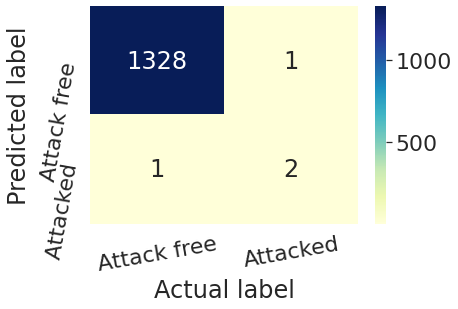

In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import pandas as pd
from pylab import savefig
import matplotlib.pyplot as plt
%matplotlib inline

def produce_matrix(cm_name, name):

  cm_matrix = pd.DataFrame(data=cm_name, columns=['Attack free', 'Attacked'], 
                                  index=['   Attack free ', ' Attacked'])
  sns.set(font_scale=2)
  sns.heatmap(cm_matrix, annot=True, fmt= 'd', cmap='YlGnBu')
  # plt.title("Confusion Matrix for All attack")
  plt.xlabel("Actual label")
  plt.ylabel("Predicted label")
  plt.yticks(rotation = 80)
  plt.xticks(rotation = 10)
  plt.rcParams['font.size'] = 4
  plt.rcParams['figure.figsize'] = (1, 1)   
  plt.savefig('confusion_opel'+str(name)+'.pdf', bbox_inches = "tight")
  plt.savefig('confusion_opel'+str(name)+'.png', bbox_inches = "tight")
  plt.savefig('confusion_opel'+str(name)+'.svg', bbox_inches = "tight")


produce_matrix(cm_diag,"diagnostic")
# produce_matrix(cm_dos,"dos")
# produce_matrix(cm_canid,"can_id")
# produce_matrix(cm_pay,"fuzzy_payload")
# produce_matrix(cm_replay,"replay")
# produce_matrix(cm_sus,"Suspenstion")
# produce_matrix(cm_mixed,"Mixed")
# produce_matrix(cm_overall,"Overall")

